In [1185]:
#IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [1186]:
#importing data
df = pd.read_csv('googleplaystore.csv')

## EDA & DATA CLEANING

In [1187]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [1188]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1189]:
#very many of the numerical columns are type object
#aslo nulls in many columns, especially in rating
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1190]:
#only the rating column is numeric
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [1191]:
#getting group specific mean of rating for each category. group in this case: category
cat_mean = dict(round(df.groupby(['Category']).Rating.mean(), 1))

In [1192]:
#filling nan of each category with groupspecific mean
for i in cat_mean.items():
    df.loc[(df.Category==i[0])& (df.Rating.isna()==True), 'Rating'] = i[1]

In [1193]:
#checking if there are any nulls left in rating
df.loc[df['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [1194]:
#dropping remaining nulls (other columns). only 12 drops
df.dropna(inplace=True)

In [1195]:
#looking at values in price column
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [1196]:
#getting rid of dollarsign in price col and making it float
df.Price = df.Price.str.strip('$').astype('float')

In [1197]:
#making reviews col integer
df.Reviews=df.Reviews.astype('int')

In [1198]:
#getting rid of comma and + in install col and making it integer. also meaning install-col is rounded (no '+')
df.Installs=df.Installs.str.replace(',', '').str.strip('+').str.replace('Free', '0').astype('int')

In [1199]:
#lookin at size col. seeing some are in megabyte some in kilobyte and many 'varies with device'.
df.Size.value_counts()

Varies with device    1694
11M                    197
12M                    196
14M                    193
13M                    191
                      ... 
655k                     1
924k                     1
986k                     1
730k                     1
898k                     1
Name: Size, Length: 457, dtype: int64

In [1200]:
#getting all the sizes that are in kilobytes
ksize= dict(df.loc[df.Size.str.contains('k'), 'Size'])

In [1201]:
#looping to make list with all sizes in kilobytes but without k and converted to Megabytes (1MB = 1024KB)
lst = []
for i in ksize.values():
    i = i.replace('k','')
    i = round(float(i) / 1024, 2)
    lst.append(i)

In [1202]:
#making the change in the df
df.loc[df.Size.str.contains('k'), 'Size'] = [i for i in lst]

In [1203]:
#getting all sizes that are in megabytes
msize= dict(df.loc[df.Size.str.contains('M')==True, 'Size'])

In [1204]:
#looping to make list with all sizes in megabytes but without M
lst = []
for i in msize.values():
    i = i.replace('M','')
    i = float(i)
    lst.append(i)

In [1205]:
#making the change in the df
df.loc[df.Size.str.contains('M')==True, 'Size'] = [i for i in lst]

In [1206]:
#checking it worked. still have all of the 'varies with device'
df.Size.value_counts()

Varies with device    1694
11.0                   197
12.0                   196
14.0                   193
13.0                   191
                      ... 
0.48                     1
0.91                     1
0.78                     1
0.56                     1
0.65                     1
Name: Size, Length: 274, dtype: int64

In [1207]:
#changing all of the 'varies' to nan
df.loc[df.Size=='Varies with device', 'Size'] = np.nan

In [1208]:
#making size float
df.Size = df.Size.astype('float')

In [1209]:
#getting mean size of each category
cat_size_mean = dict(round(df.groupby(['Category']).Size.mean(),2))

In [1210]:
#replacing all size-nan with mean size of their category
for i in cat_size_mean.items():
    df.loc[(df.Category==i[0])& (df.Size.isna()==True), 'Size'] = i[1]

In [1211]:
#looking at the type. all either pay or free
df.Type.value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

In [1212]:
# making type binary. 1 is free, 0 is paid
df.Type = df.Type.map({'Free':1, 'Paid':0})

In [1213]:
#making 'last updated' column into datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [1214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  int64         
 4   Size            10829 non-null  float64       
 5   Installs        10829 non-null  int64         
 6   Type            10829 non-null  int64         
 7   Price           10829 non-null  float64       
 8   Content Rating  10829 non-null  object        
 9   Genres          10829 non-null  object        
 10  Last Updated    10829 non-null  datetime64[ns]
 11  Current Ver     10829 non-null  object        
 12  Android Ver     10829 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 1.2+ MB


## EDA & VISUALIZATION

In [1215]:
#looking at distribution of apps over categories
df.Category.value_counts()

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

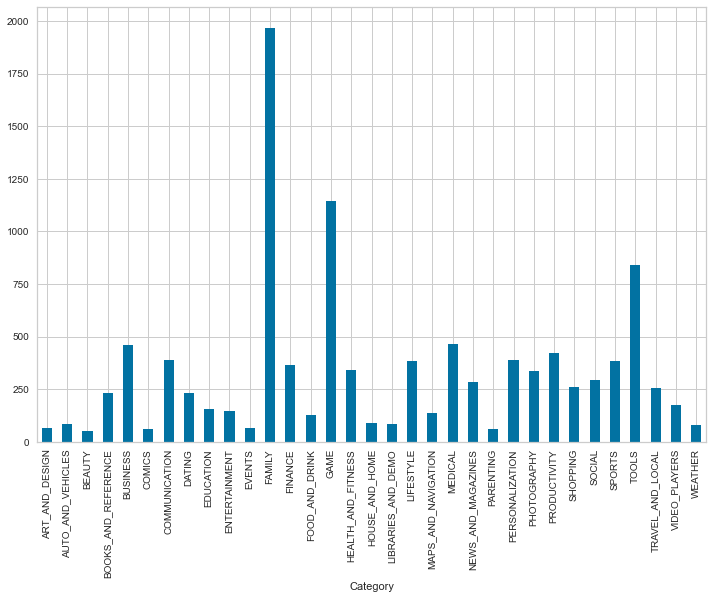

In [1219]:
#looking at distribution of apps over categories, visualized
df.groupby('Category').Category.count().plot(kind='bar', figsize=(12,8))

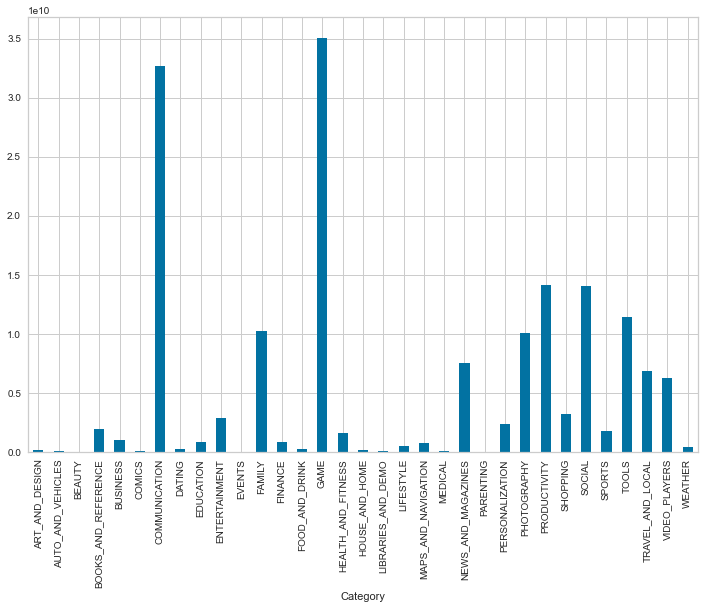

In [1217]:
#looking at distribution of installs over categories, visualized
df.groupby('Category').Installs.sum().plot(kind='bar', figsize=(12,8))

In [1218]:
#total installs
df.Installs.sum()

167631856377

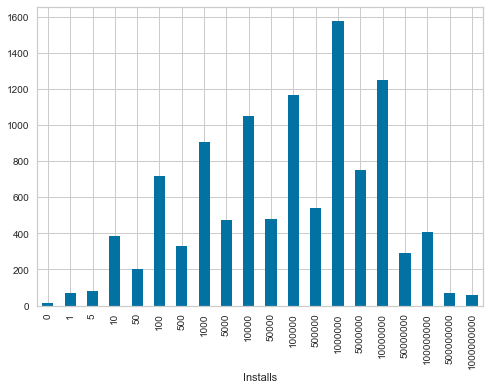

In [1246]:
#how many apps have been installed how many times?
df.groupby('Installs').Installs.count().plot(kind='bar')

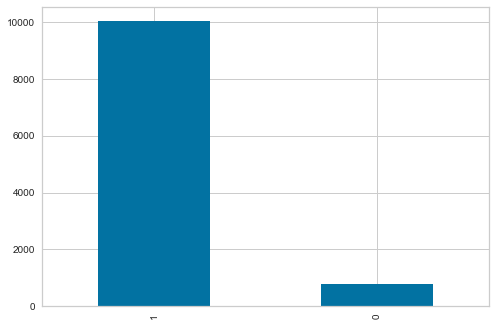

In [1221]:
#free/ paid app distribution
df.Type.value_counts().plot(kind='bar')

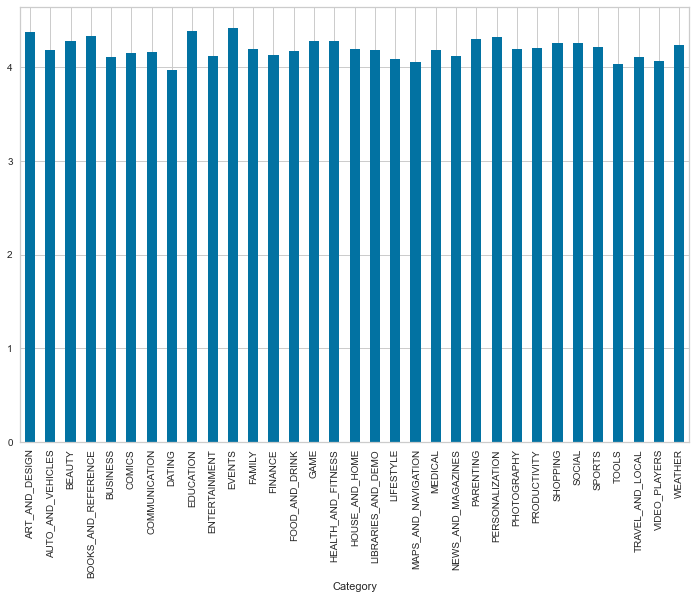

In [1222]:
#mean raing of apps in each category
df.groupby('Category').Rating.mean().plot(kind='bar', figsize=(12,8))

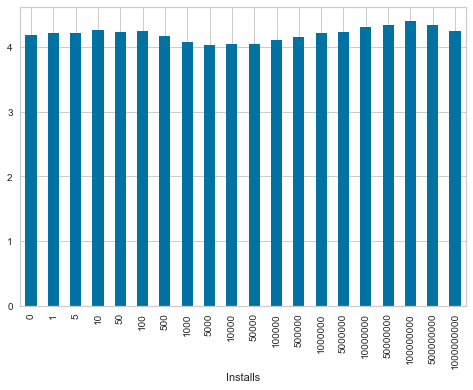

In [1249]:
#mean rating for apps with a certain number of insalls
df.groupby('Installs').Rating.mean().plot(kind='bar')

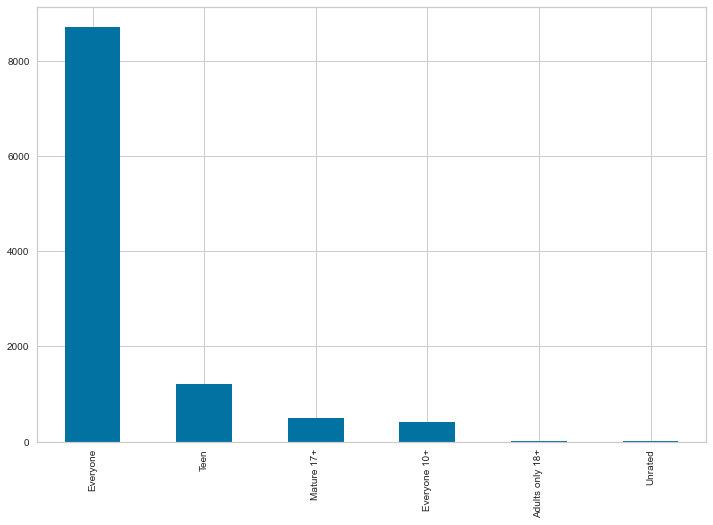

In [1223]:
#distribution of content rating
df['Content Rating'].value_counts().plot(kind='bar', figsize=(12,8))

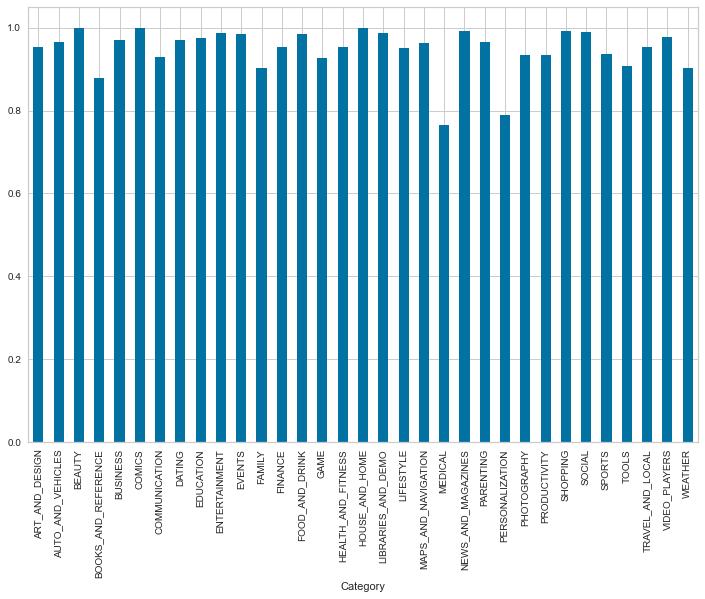

In [1099]:
#looking at the percentage of free apps in each category
perc_free=df.groupby('Category')['Type'].sum()/df.groupby('Category')['Type'].count()


perc_free.plot(kind='bar', figsize=(12,8))

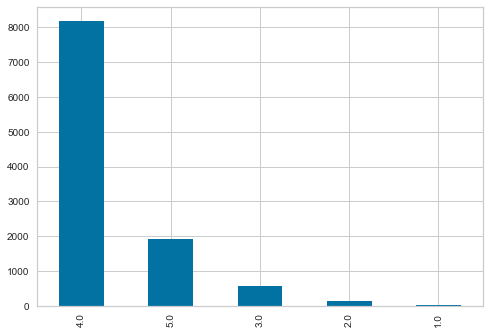

In [1251]:
#apps and rating, distribution
round(df.Rating, 0).value_counts().plot(kind='bar')

## Data Transformation

In [1224]:
#making copy of datafram so i can always return to this point
df1 = df.copy()

In [1225]:
#getting rid of a few columns in the new df
df1.drop(['App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [1226]:
#getting dummies for category and content rating in new df
df1 = pd.get_dummies(data=df1, columns=['Category', 'Content Rating'])


In [1227]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [1228]:
#scaling only some columns (not binary ones)
col_names = ['Rating', 'Reviews', 'Size', 'Installs','Type', 'Price']
features = df1[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [1229]:
#applying scaled values to new df
df1[col_names] = features

In [1230]:
#importing PCA
from sklearn.decomposition import PCA

In [1231]:
pca = PCA(n_components=4)
pc = pca.fit_transform(df1)
principalDf = pd.DataFrame(data=pc,
                          columns=['pc1', 'pc2','pc3','pc4'])

principalDf.head()

,pc1,pc2,pc3,pc4
0,-0.249418,-0.281183,0.187047,0.042806
1,-0.351477,-0.305366,0.623221,0.183905
2,-0.117325,-0.140377,-0.267435,-1.172768
3,0.434188,-0.186991,-0.515951,-0.298914
4,-0.348518,-0.207446,0.451109,-0.759299


<BarContainer object of 4 artists>

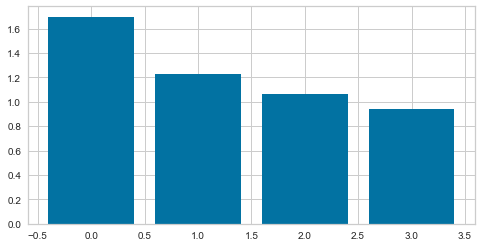

In [1233]:
features = range(pca.n_components_)
plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15])

## KMeans

In [1235]:
#importing and fitting KMeans clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(df1)

KMeans(n_clusters=2)

In [1236]:
#looking at inertia and silhouette for different number of clusters

for i in range(2,7):
    kmeans = KMeans(n_clusters=i)
    print('n_clusters:', i,', inertia:', kmeans.fit(df1).inertia_, ', silhouette:',silhouette_score(df1,kmeans.labels_) )

    


n_clusters: 2 , inertia: 67234.39048410296 , silhouette: 0.4868122276758774
n_clusters: 3 , inertia: 54496.60147222075 , silhouette: 0.5080615098529968
n_clusters: 4 , inertia: 44699.71693821266 , silhouette: 0.47426250247138735
n_clusters: 5 , inertia: 37419.19184314991 , silhouette: 0.3098219957103504
n_clusters: 6 , inertia: 32038.58299527656 , silhouette: 0.3018773450178767


In [787]:
#installing yellowbrick to look at elbow in visualization
! pip install yellowbrick

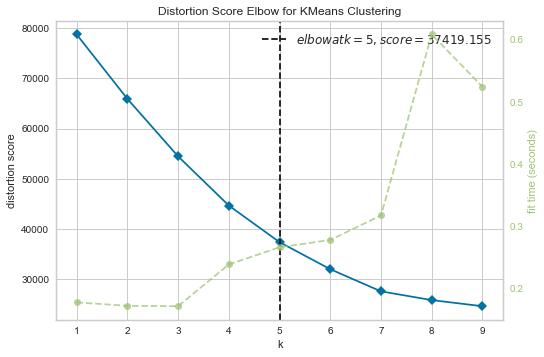

In [1237]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()

viz = KElbowVisualizer(kmeans, k=(1,10))

num_cols = df1
viz.fit(num_cols)
viz.poof()
# 5 clusters seems to be best

In [1240]:
#geting labels for the clusters
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit(df1).labels_

In [1241]:
#creating new column in df with the labels
df['labels'] = labels

In [1242]:
#looking at distribution of the labels
df.labels.value_counts()

3    8148
1    1769
2     779
0     115
4      18
Name: labels, dtype: int64

## Agglomerative

In [1111]:
#importing agglomarative clustering and fitting and getting labels
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

aggm = AgglomerativeClustering(n_clusters=5, linkage='complete')
aggm.fit(df1)
y_agg = aggm.labels_
print("Silhouette Score:", silhouette_score(df1,y_agg))




Silhouette Score: 0.6863024806406098


In [1243]:
# creating new column in df with agg labels
df['labels_a'] = y_agg

In [1244]:
#looking at distribution
df.labels_a.value_counts()

0    10661
4       99
1       40
2       17
3       12
Name: labels_a, dtype: int64

In [1109]:
#looking at prices and labels
pd.crosstab(df.Price, df.labels_a)

labels_a,0,1,2,3,4
Price,,,,,
0.00,9881,40,0,12,99
0.99,146,0,0,0,0
1.00,3,0,0,0,0
1.04,1,0,0,0,0
1.20,1,0,0,0,0
...,...,...,...,...,...
379.99,0,0,1,0,0
389.99,0,0,1,0,0
394.99,0,0,1,0,0


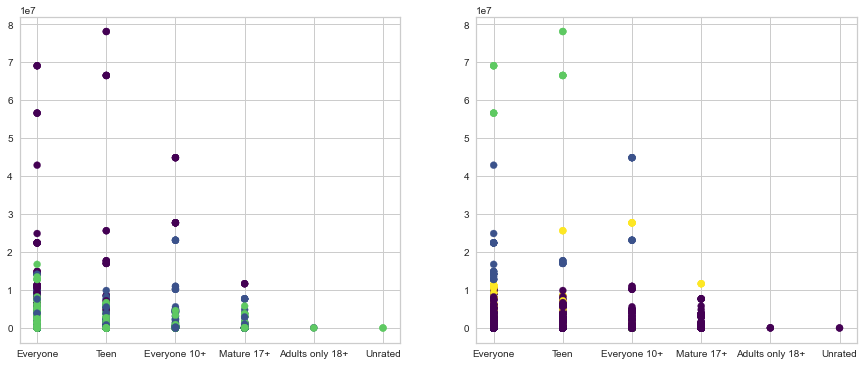

In [1247]:
#distribution of contentrating, reviews and labels for kmeans and agg
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.scatter(x=df['Content Rating'], y=df.Reviews, c=df.labels, cmap='viridis')
ax2.scatter(x=df['Content Rating'], y=df.Reviews, c=df.labels_a, cmap='viridis')
plt.show()

#### Going ahead with KMeans

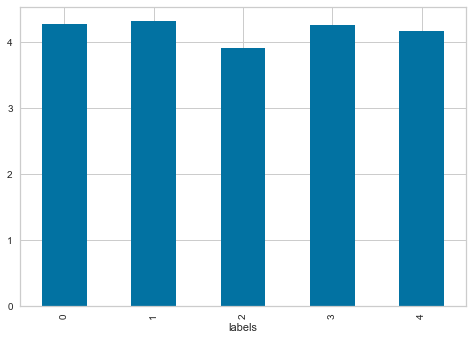

In [935]:
#average rating of apps in each cluster
df.groupby('labels').Rating.mean().plot(kind='bar')

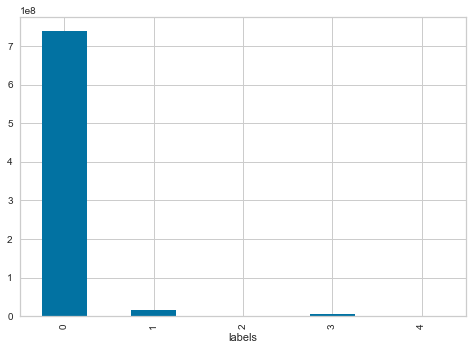

In [1252]:
#average installs of apps in each cluster
df.groupby('labels').Installs.mean().plot(kind='bar')

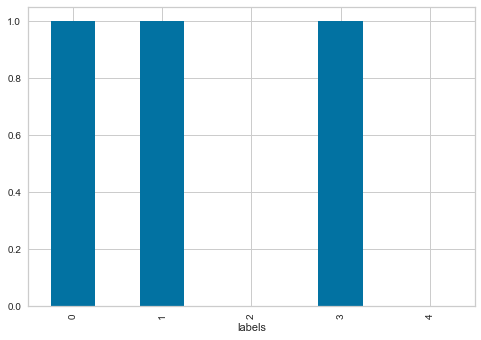

In [1263]:
#that is: 0,1,3 have free apps(1) and 2,4 paid apps (0)
df.groupby('labels').Type.mean().plot(kind='bar')

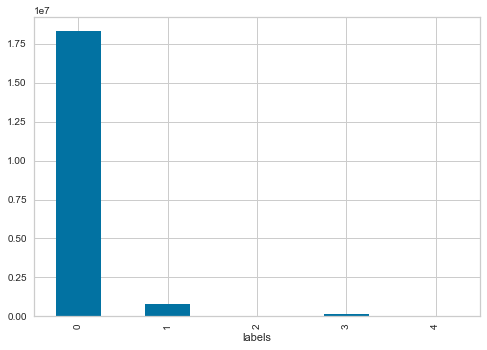

In [1264]:
#avg reviews per app per cluster
df.groupby('labels').Reviews.mean().plot(kind='bar')

In [1265]:
df.groupby('labels').Reviews.mean().astype('int')

labels
0    18306340
1      768770
2       11975
3      164466
4         502
Name: Reviews, dtype: int64

In [1266]:
df.groupby('labels').Installs.mean().astype('int')

labels
0    738260869
1     16636047
2        93306
3      6532864
4        12172
Name: Installs, dtype: int64

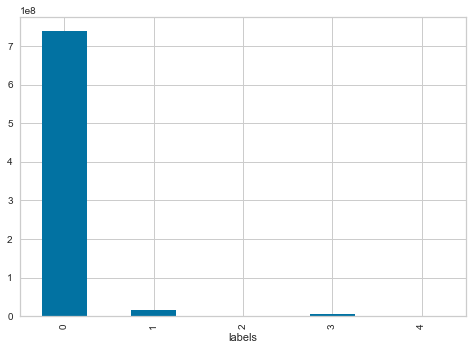

In [1267]:
#avg installs per app for each cluster
df.groupby('labels').Installs.mean().astype('int').plot(kind='bar')

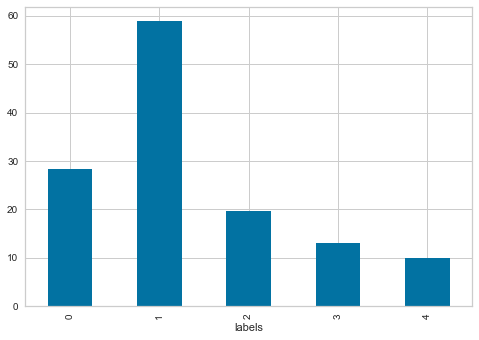

In [1268]:
#avg size of apps in each cluster
df.groupby('labels').Size.mean().plot(kind='bar')

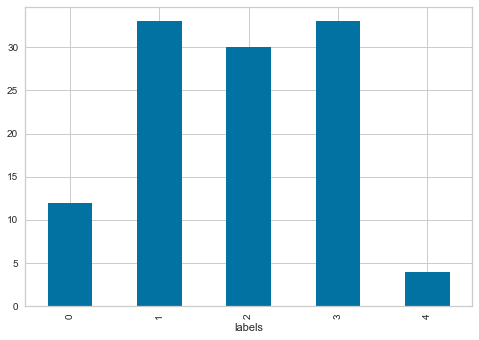

In [1269]:
#there are 33 cats. how many of the cats are represented in each cluster
df.groupby('labels').Category.nunique().plot(kind='bar')

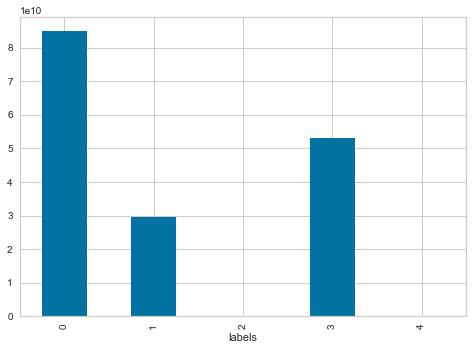

In [1271]:
#totalinstalls per cluster
df.groupby(['labels']).Installs.sum().plot(kind='bar')

In [1273]:
df.groupby(['Category']).labels.value_counts(normalize=True)

Category           labels
ART_AND_DESIGN     3         0.937500
                   2         0.046875
                   1         0.015625
AUTO_AND_VEHICLES  3         0.835294
                   1         0.129412
                               ...   
VIDEO_PLAYERS      0         0.034286
                   2         0.022857
WEATHER            3         0.841463
                   2         0.097561
                   1         0.060976
Name: labels, Length: 112, dtype: float64

In [1274]:
(df.Price*df.Installs).sum()

388578445.89000005

In [1280]:
df['rev'] = (df.Price*df.Installs)

In [1281]:
#total pays. installs*price
df.rev.sum()

388578445.89000005

In [1282]:
#total pays for cluster 4 of only 18 apps
df.loc[(df.labels==4)].rev.sum()

86517909.0

In [1285]:
#cluster 4 perc of total pays 18 apps
(df.loc[(df.labels==4)].rev.sum())/(df.rev.sum())

0.22265236251547454

In [1287]:
#cluster 2 perc of total pays 779 apps
(df.loc[(df.labels==2)].rev.sum())/(df.rev.sum())

0.7773476374845253

In [1288]:
df.loc[df.labels==2]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,labels,labels_a,rev
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.80,100000,0,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2,0,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.00,100000,0,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2,0,499000.0
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.80,100000,0,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2,0,499000.0
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.00,100000,0,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2,0,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,11.77,100000,0,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,2,0,399000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.2,17,0.15,100,0,0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up,2,0,99.0
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.40,1000,0,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,2,0,7990.0
10782,Trine 2: Complete Story,GAME,3.8,252,11.00,10000,0,16.99,Teen,Action,2015-02-27,2.22,5.0 and up,2,0,169900.0
10785,"sugar, sugar",FAMILY,4.2,1405,9.50,10000,0,1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up,2,0,12000.0


In [1289]:
#7% of apps 100% of total pays
(779+18)/10829

0.0735986702373257

In [1290]:
(df.loc[df.Type==0].Type.count())/(df.Type.count())

0.0735986702373257

In [1292]:
#cluster dist over categories
catlab = pd.crosstab(df.Category, df.labels)
catlab

labels,0,1,2,3,4
Category,,,,,
ART_AND_DESIGN,0,1,3,60,0
AUTO_AND_VEHICLES,0,11,3,71,0
BEAUTY,0,3,0,50,0
BOOKS_AND_REFERENCE,1,11,28,190,0
BUSINESS,0,30,14,416,0
COMICS,0,3,0,57,0
COMMUNICATION,34,11,27,315,0
DATING,0,24,7,203,0
EDUCATION,0,17,4,135,0


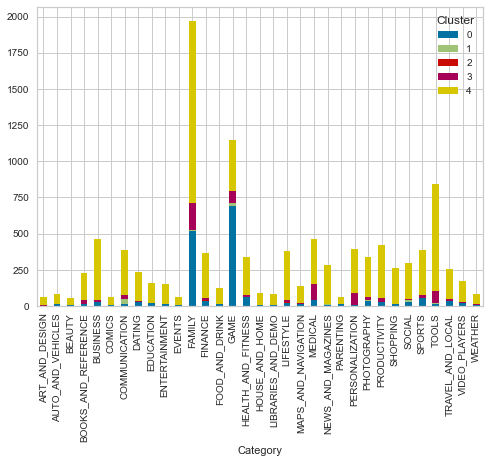

In [1030]:
#here as barplot
catlab.plot.bar(stacked=True)
plt.legend(title='Cluster')

plt.show()

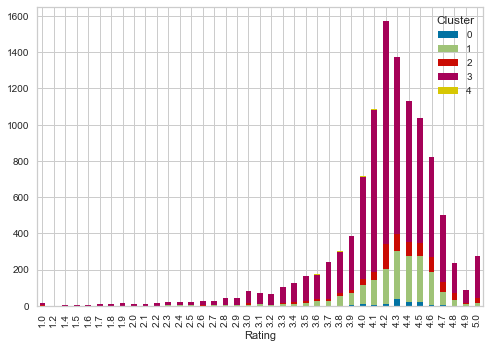

In [1293]:
#cluster distribution over rating-score
pd.crosstab(df['Rating'], df.labels).plot.bar(stacked=True)
plt.legend(title='Cluster')

plt.show()

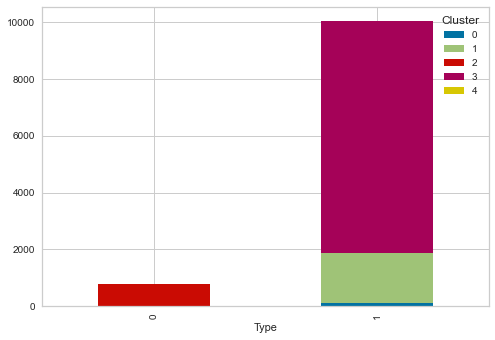

In [1294]:
#cluster dist voer type (paid, free)
pd.crosstab(df['Type'], df.labels).plot.bar(stacked=True)
plt.legend(title='Cluster')

plt.show()